In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import regularizers


# Data Loading

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [4]:
train_labels = train['label']
train1 = train.drop('label', axis=1)

train1 = np.asarray(train1).astype('float32')/255
test = np.asarray(test).astype('float32')/255
train1 = train1.reshape(train1.shape[0], 28, 28, 1)
test = test.reshape(test.shape[0], 28, 28, 1)

train_labels = to_categorical(train_labels)

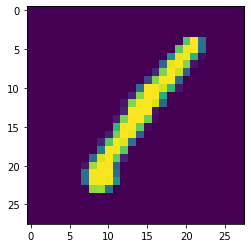

In [5]:
img = train1[0]*255
img_reshape = img.reshape(28, 28)
plt.imshow(img_reshape)
plt.show()

In [6]:
print(train1.shape)
print(train_labels.shape)

(42000, 28, 28, 1)
(42000, 10)


In [7]:
X_train, X_val, y_train, y_val= train_test_split(train1, train_labels, test_size=0.2)

# CNN Model

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(28, 28, 1), 
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        padding='same',
                        kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))

from keras import optimizers

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
model.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=20, 
                    validation_data=(X_val, y_val))

Epoch 1/20
263/263 [==============================] - 9s 7ms/step - loss: 0.9327 - acc: 0.7319 - val_loss: 0.2607 - val_acc: 0.9533
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2203 - acc: 0.9650 - val_loss: 0.1861 - val_acc: 0.9731
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1753 - acc: 0.9772 - val_loss: 0.1623 - val_acc: 0.9780
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1499 - acc: 0.9815 - val_loss: 0.1459 - val_acc: 0.9793
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1324 - acc: 0.9838 - val_loss: 0.1350 - val_acc: 0.9823
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1228 - acc: 0.9843 - val_loss: 0.1346 - val_acc: 0.9812
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1167 - acc: 0.9852 - val_loss: 0.1266 - val_acc: 0.9818
Epoch 8/20
263/263 [==============================] - 1s 5ms/step - loss: 0.

# Model Evaluation

<AxesSubplot:>

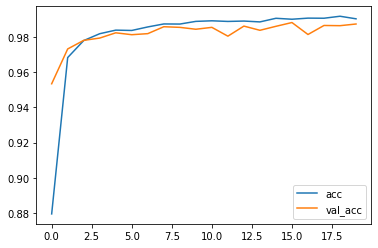

In [10]:
loss=pd.DataFrame(model.history.history)
loss[['acc', 'val_acc']].plot()

<AxesSubplot:>

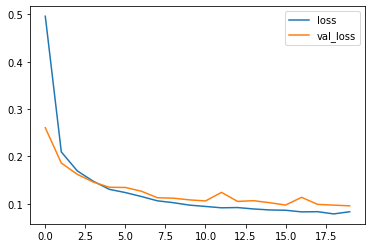

In [11]:
loss[['loss', 'val_loss']].plot()

In [12]:
model.fit(train1, train_labels, 
                    batch_size=128, 
                    epochs=20)

Epoch 1/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0856 - acc: 0.9895
Epoch 2/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0859 - acc: 0.9892
Epoch 3/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0809 - acc: 0.9905
Epoch 4/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0784 - acc: 0.9912
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0797 - acc: 0.9905
Epoch 6/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0808 - acc: 0.9901
Epoch 7/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0784 - acc: 0.9910
Epoch 8/20
329/329 [==============================] - 1s 5ms/step - loss: 0.0775 - acc: 0.9908
Epoch 9/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0769 - acc: 0.9913
Epoch 10/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0753 - acc: 0.9918
Epoch 11/20
329/329 [============================

# Prediction

In [13]:
predictions = model.predict(test, batch_size=32)
image_id = range(1, predictions.shape[0] + 1)
pred = [np.argmax(i) for i in predictions]
submission = pd.DataFrame({'ImageId': image_id, 'Label': pred})
submission.to_csv('digit_recognizer_submission', index=False)

In [14]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [15]:
ss=pd.read_csv('../input/digit-recognizer/sample_submission.csv')
ss

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
